# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [95]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [97]:
def calculate_tab(df, response_var, explanatory_var):
    tab = pd.crosstab(df[explanatory_var], df[response_var], margins=True)
    
    tab['média de doentes'] = tab['All'] / tab[1]
    
    tab['Odds'] = tab[1] / tab[0]
    
    tab['Odds_ratio'] = tab['Odds'] / tab.loc['All', 'Odds']
    
    tab['log_odds'] = np.log(tab['Odds'])
    
    tab['log_odds_ratio'] = np.log(tab['Odds_ratio'])
    
    return tab

In [98]:
calculate_tab(df, 'flag_doente', 'sex')

flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
sex,,,,,,,,
0.0,72,25,97,3.880000,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.807018,1.239130,1.461996,0.214410,0.379802
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


In [99]:
calculate_tab(df, 'flag_doente', 'exang')

flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
exang,,,,,,,,
0.0,141,63,204,3.238095,0.446809,0.527170,-0.805625,-0.640233
1.0,23,76,99,1.302632,3.304348,3.898655,1.195239,1.360632
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


In [100]:
calculate_tab(df, 'flag_doente', 'thal')

flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
thal,,,,,,,,
3.0,129,37,166,4.486486,0.286822,0.338408,-1.248894,-1.083502
6.0,6,12,18,1.500000,2.000000,2.359712,0.693147,0.858540
7.0,28,89,117,1.314607,3.178571,3.750257,1.156432,1.321824
?,1,1,2,2.000000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [101]:
def categorize_calculate_tab(df, response_var, continuous_var, num_categories=5):
    df['faixa_' + continuous_var], bins = pd.qcut(df[continuous_var], q=num_categories, labels=False, retbins=True)
    
    tab = pd.crosstab(df['faixa_' + continuous_var], df[response_var], margins=True)
    
    tab['média de doentes'] = tab['All'] / tab[1]
    
    tab['Odds'] = tab[1] / tab[0]
    
    tab['Odds_ratio'] = tab['Odds'] / tab.loc['All', 'Odds']
    
    tab['log_odds'] = np.log(tab['Odds'])
    
    tab['log_odds_ratio'] = np.log(tab['Odds_ratio'])

    print (bins)
    return tab


In [102]:
categorize_calculate_tab(df, 'flag_doente', 'age', num_categories=5)

[29. 45. 53. 58. 62. 77.]


flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
faixa_age,,,,,,,,
0,47,16,63,3.937500,0.340426,0.401653,-1.077559,-0.912166
1,42,22,64,2.909091,0.523810,0.618020,-0.646627,-0.481235
2,32,39,71,1.820513,1.218750,1.437950,0.197826,0.363218
3,13,32,45,1.406250,2.461538,2.904261,0.900787,1.066179
4,30,30,60,2.000000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


In [103]:
categorize_calculate_tab(df, 'flag_doente', 'trestbps', num_categories=5)

[ 94.  120.  126.  134.  144.6 200. ]


flag_doente,0,1,All,média de doentes,Odds,Odds_ratio,log_odds,log_odds_ratio
faixa_trestbps,,,,,,,,
0,60,37,97,2.621622,0.616667,0.727578,-0.483427,-0.318034
1,10,15,25,1.666667,1.500000,1.769784,0.405465,0.570858
2,35,27,62,2.296296,0.771429,0.910175,-0.259511,-0.094119
3,34,24,58,2.416667,0.705882,0.832840,-0.348307,-0.182914
4,25,36,61,1.694444,1.440000,1.698993,0.364643,0.530036
All,164,139,303,2.179856,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [104]:
modelo_logistico = smf.logit('flag_doente ~ C(sex) + cp + trestbps + age', data=df).fit()

modelo_logistico.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.2605
Time:                        21:49:40   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.1167      1.608     -6.915      0.000     -14.267      -7.966
C(sex)[T.1.0]     1.8021      0.331      5.444      0.000       1.153       2.451
cp                1.1403      0.169      6.739      0.000       0.809       1.472
trestbps          0.0214      0.008      2.600      0.009       0.005       0.037
age               0.0582      0.017      3.348      0.001       0.024       0.092
=================================================================================
"""

### Interpretações

**sex:**

O coeficiente positivo de `sex` sugere que indivíduos do sexo masculino têm maiores chances de ter a doença em comparação com o sexo feminino. O valor de 1.8021 implica que a razão de chances (odds ratio) de ter a doença para o sexo masculino é 6.06 `exp(1.8021)` vezes maior que para o sexo feminino.

**age:**

Um coeficiente de 0.0582 para `age` indica que, para cada aumento de um ano na idade, a razão de chances de ter a doença aumenta. A razão de chances correspondente é 1.06. `exp(0.0582)`

In [105]:
# np.exp(1.8021)

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [106]:
df['predito'] = modelo_logistico.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,faixa_age,faixa_trestbps,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,4,4,0.196041
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,4,4,0.928431
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,4,0,0.846558
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0,2,0.276207
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0,2,0.024768


In [107]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')

group_reg = df.groupby(cat_pred)

In [108]:
# for name, group in group_reg:
#     print(f"Group name: {name}")
#     print(group)

In [109]:
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})

qualid['predito'] = group_reg['predito'].mean()

qualid['pct_doentes'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doentes
predito,,,
"(0.0119, 0.146]",61,0.076255,0.098361
"(0.146, 0.349]",60,0.249060,0.183333
"(0.349, 0.575]",61,0.457982,0.491803
"(0.575, 0.772]",60,0.673059,0.683333
"(0.772, 0.928]",61,0.837449,0.836066


Text(0.5, 0, 'Grupo')

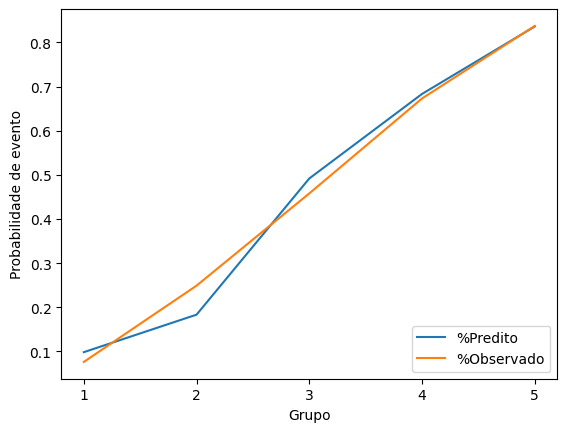

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doentes'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [112]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nGINI: {1:.2f}%'.format(ks*100, gini*100))

Acurácia: 77.89%
KS: 58.40% 
GINI: 66.22%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [113]:
modelo_logistico2 = smf.logit('flag_doente ~ C(sex) + cp + trestbps + age + C(fbs) + C(slope)', data=df).fit()

modelo_logistico2.summary()

Optimization terminated successfully.
         Current function value: 0.456761
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 Jul 2024   Pseudo R-squ.:                  0.3378
Time:                        21:54:50   Log-Likelihood:                -138.40
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 2.869e-27
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.6828      1.725     -6.771      0.000     -15.065      -8.301
C(sex)[T.1.0]       2.0388      0.367      5.561      0.000       1.320       2.757
C(fbs)[T.1.0]      -0.1804      0.425     -0.425      0.671      -1.013       0.652
C(slope)[T.2.0]     1.7414      0.326      5.344      0.000       1.103       2.380
C(slope)[T.3.0]     1.2517      0.577      2.168      0.030       0.120       2.383
cp                  1.0962      0.174      6.316      0.000       0.756       1.436
trestbps            0.0236      0.009      2.664      0.008       0.006       0.041
age                 0.0462      0.018      2.526      0.012       0.010       0.082
===================================================================================
"""

In [114]:
df['predito_2'] = modelo_logistico2.predict(df)

cat_pred = pd.qcut(df['predito_2'], 5, duplicates='drop')

group_reg = df.groupby(cat_pred)

qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})

qualid['predito_2'] = group_reg['predito'].mean()

qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito_2,pct_doente
predito_2,,,
"(0.00489, 0.114]",61,0.106549,0.065574
"(0.114, 0.329]",60,0.268420,0.200000
"(0.329, 0.586]",61,0.484581,0.426230
"(0.586, 0.825]",60,0.629483,0.716667
"(0.825, 0.967]",61,0.804374,0.885246


In [115]:
acc = metrics.accuracy_score(df['flag_doente'], df['predito_2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 79.21%


### Interpretações

O `modelo_logistico2` inclui C(fbs) e C(slope), que não estão presentes no `modelo_logistico`. Essa inclusões melhoraram a capacidade explicativa do modelo, como indicado pelo aumento no **Pseudo R-squared** e a melhoria no **Log-Likelihood**.

**Pseudo R-squared:**

- Modelo 1: 0.2605
- Modelo 2: 0.3378

**Log-Likelihood:**

- Modelo 1: -154.55
- Modelo 2: -138.40

**Análise da acurácia:**

Enquanto o Modelo 1 teve uma acurácia de 77.89%, o Modelo 2 teve 79.21%. Ou seja, uma melhora no desempenho do modelo.